# Modeling Op Amps {#sec-Modeling_Op_Amps}
change title and focus to Op Amp circuits

MNA Op Amps 

Does the circuit still work if the Op Amp inputs are switched?

Types of of Op Amp circuits

- filters
- oscillators - this could be a separate notebook
- references and regulators
- amplifiers
- integrators
- differentiators
- non linerar circuits
- inductance simulator
- capacitance multiplier

Stamp theory

- Nullor model vs Op Amp stamp.

https://lpsa.swarthmore.edu/Systems/Electrical/mna/MNA5.html
Caveats: The two ideal op-amp assumptions (no input current, no potential difference at inputs) only hold for circuits with negative feedback.  Because of this, the MNA method as applied here can give erroneous results if negative feedback is not present.  This problem actually persists in many commercial circuit simulators -- you can hook up a circuit with the input terminals reversed (so that it would not operate properly in practice due to lack of negative feedback) and the simulation behaves as if there is no problem.  Note also that the output of the op-amp is not limited by any power supply -- this circuit will happily generate hundreds of volts.


Resistors, capacitors, inductors and Op Amps are the circuit ements modeled in MNA code. The Op Amps are assimed to be ideal linear amplifiers. 

most common component used in linear circuits. Of corrse transistors can be bioaded to perate in thheir linear range and Op Amps can be used in non-linear circuits. 

Op Amp stamp

- Op Amp is ideal
- DC negative feedback is present in the surrounding circuit
  - Why is a DC path needed in feedback?

- Discuss Op Amp models, where does the model work and where doesn’t it work and why. What are the differences between the models.
  - From Filter Handbook, @Williams1995, see fig 3-18, 3-34, 5-27
- what is an Ideal Op Amp?



## Introduction

## Circuit description

- NIC filter
- DAFB BPF
- integrator
- differentiator
- capacitance multiplier


```
* C:\users\jeff64\My Documents\Modeling Op Amps\Active-LP-Filter.asc
XU2 6 4 7 opamp Aol=100K GBW=10Meg
V1 1 0 AC 1
XU1 6 8 5 opamp Aol=100K GBW=10Meg
C1 3 1 1
C2 5 4 1
C3 7 6 1
C4 0 2 1
R2 5 6 1
R3 7 8 1.0218
R4 8 0 1
R1 4 3 0.5534
R5 2 4 2.425
.lib opamp.sub
* Filter Handbook Fig. 3-34c
.ac dec 100 0.1 10
.backanno
.end
```


## Circuit analysis

## References and notes

What is an Op Amp?

[Operational amplifier](https://en.wikipedia.org/wiki/Operational_amplifier)


Nullors, Gyrators, NICs, Current Conveyors 

Nullor circuits

[Nullor](https://en.wikipedia.org/wiki/Nullor)

A nullor is a theoretical two-port network consisting of a nullator at its input and a norator at its output.[1] Nullors represent an ideal amplifier, having infinite current, voltage, transconductance and transimpedance gain.[2] Its transmission parameters are all zero, that is, its input–output behavior is summarized with the matrix equation


$$\begin{pmatrix} v_1\\i_1 \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}  \begin{pmatrix}v_{2} \\ i_{2}\end{pmatrix}$$


$\begin{pmatrix} v_1\\i_1 \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}  \begin{pmatrix}v_{2} \\ i_{2}\end{pmatrix}$

In negative-feedback circuits, the circuit surrounding the nullor determines the nullor output in such a way as to force the nullor input to zero. 




Impedance Converters and Inverters (Gyrators, NICs, Current Conveyors)

[Gyrators](https://en.wikipedia.org/wiki/Gyrator)


[Negative Impedance Converter circuits](https://en.wikipedia.org/wiki/Negative_impedance_converter)


[Current conveyor](https://en.wikipedia.org/wiki/Current_conveyor


Frequency dependent negative resistor](https://en.wikipedia.org/wiki/Frequency_dependent_negative_resistor)


https://www.allaboutcircuits.com/




In [1]:
from sympy import *
import numpy as np
from tabulate import tabulate
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

### Load the netlist
The netlist for @fig-bridge-t is pasted into the cell below and some edits were made to remove the inductor series resistance. 

In [49]:
net_list = '''
O2 6 4 7 
V1 1 0 1
O1 6 8 5 
C1 3 1 1
C2 5 4 1
C3 7 6 1
C4 0 2 1
R2 5 6 1
R3 7 8 1.0218
R4 8 0 1
R1 4 3 0.5534
R5 2 4 2.425
R6 2 0 10e6
'''

Generate the network equations.

In [50]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [51]:
print(report)

Net list report
number of lines in netlist: 13
number of branches: 11
number of nodes: 8
number of unknown currents: 3
number of RLC (passive components): 10
number of inductors: 0
number of independent voltage sources: 1
number of independent current sources: 0
number of op amps: 2
number of E - VCVS: 0
number of G - VCCS: 0
number of F - CCCS: 0
number of H - CCVS: 0
number of K - Coupled inductors: 0



In [52]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$C_{1} s v_{1} - C_{1} s v_{3} + I_{V1} = 0$<br>$v_{2} \left(C_{4} s + \frac{1}{R_{6}} + \frac{1}{R_{5}}\right) - \frac{v_{4}}{R_{5}} = 0$<br>$- C_{1} s v_{1} + v_{3} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{1}} = 0$<br>$- C_{2} s v_{5} + v_{4} \left(C_{2} s + \frac{1}{R_{5}} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{R_{5}} - \frac{v_{3}}{R_{1}} = 0$<br>$- C_{2} s v_{4} + I_{O1} + v_{5} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{6}}{R_{2}} = 0$<br>$- C_{3} s v_{7} + v_{6} \left(C_{3} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}} = 0$<br>$- C_{3} s v_{6} + I_{O2} + v_{7} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{8}}{R_{3}} = 0$<br>$v_{8} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{7}}{R_{3}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{4} + v_{6} = 0$<br>$v_{6} - v_{8} = 0$<br>

As shown above MNA generated many equations and these would be difficult to solve by hand and a symbolic soultion would take a lot of computing time. The equations are displace in matrix notation.

In [53]:
NE_sym

⎡        C₁⋅s⋅v₁ - C₁⋅s⋅v₃ + I_V1        ⎤       
⎢                                        ⎥       
⎢           ⎛       1    1 ⎞   v₄        ⎥       
⎢        v₂⋅⎜C₄⋅s + ── + ──⎟ - ──        ⎥       
⎢           ⎝       R₆   R₅⎠   R₅        ⎥       
⎢                                        ⎥       
⎢                   ⎛       1 ⎞   v₄     ⎥       
⎢     -C₁⋅s⋅v₁ + v₃⋅⎜C₁⋅s + ──⎟ - ──     ⎥   ⎡0 ⎤
⎢                   ⎝       R₁⎠   R₁     ⎥   ⎢  ⎥
⎢                                        ⎥   ⎢0 ⎥
⎢              ⎛       1    1 ⎞   v₂   v₃⎥   ⎢  ⎥
⎢-C₂⋅s⋅v₅ + v₄⋅⎜C₂⋅s + ── + ──⎟ - ── - ──⎥   ⎢0 ⎥
⎢              ⎝       R₅   R₁⎠   R₅   R₁⎥   ⎢  ⎥
⎢                                        ⎥   ⎢0 ⎥
⎢                      ⎛       1 ⎞   v₆  ⎥   ⎢  ⎥
⎢ -C₂⋅s⋅v₄ + I_O1 + v₅⋅⎜C₂⋅s + ──⎟ - ──  ⎥   ⎢0 ⎥
⎢                      ⎝       R₂⎠   R₂  ⎥   ⎢  ⎥
⎢                                        ⎥ = ⎢0 ⎥
⎢                   ⎛       1 ⎞   v₅     ⎥   ⎢  ⎥
⎢     -C₃⋅s⋅v₇ + v₆⋅⎜C₃⋅s + ──⎟ - ──     ⎥   ⎢0 ⎥


The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [54]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

In [55]:
element_values = SymMNA.get_part_values(network_df)
element_values

{C₁: 1.0, C₂: 1.0, C₃: 1.0, C₄: 1.0, O₁: nan, O₂: nan, R₁: 0.5534, R₂: 1.0, R₃
: 1.0218, R₄: 1.0, R₅: 2.425, R₆: 10000000.0, V₁: 1.0}

### Transfer function
Solving for the transfer function at node 2. Transfer functions are normally presented in the frequency domain and are steady state responses.

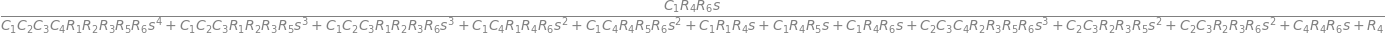

In [56]:
U_sym = solve(NE_sym,X)

H_sym = U_sym[v2]/U_sym[v1]
H_sym

### Numerical solution

In [57]:
NE = NE_sym.subs(element_values)
NE

⎡                              I_V1 + 1.0⋅s⋅v₁ - s⋅v₃                         
⎢                                                                             
⎢              v₂⋅(1.0⋅s + 0.412371234020619) - 0.412371134020619⋅v₄          
⎢                                                                             
⎢           -s⋅v₁ + v₃⋅(1.0⋅s + 1.80701120346946) - 1.80701120346946⋅v₄       
⎢                                                                             
⎢-s⋅v₅ - 0.412371134020619⋅v₂ - 1.80701120346946⋅v₃ + v₄⋅(1.0⋅s + 2.2193823374
⎢                                                                             
⎢                       I_O1 - s⋅v₄ + v₅⋅(1.0⋅s + 1.0) - v₆                   
⎢                                                                             
⎢                          -s⋅v₇ - v₅ + v₆⋅(1.0⋅s + 1.0)                      
⎢                                                                             
⎢       I_O2 - s⋅v₆ + v₇⋅(1.0⋅s + 0.978665100802505)

In [58]:
U = solve(NE,X)

In [59]:
temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{3.43081007509371 \cdot 10^{60} s}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410846771721 \cdot 10^{61} s^{3} + 1.37239273124983 \cdot 10^{61} s^{2} + 6.86162117201991 \cdot 10^{60} s + 3.43081013981931 \cdot 10^{53}}$<br>$v_{3} = \frac{4.70450000000002 \cdot 10^{60} s^{4} + 1.94000047045001 \cdot 10^{60} s^{3} + 1.02183247276591 \cdot 10^{61} s^{2} + 3.43081109692619 \cdot 10^{60} s}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410846771721 \cdot 10^{61} s^{3} + 1.37239273124983 \cdot 10^{61} s^{2} + 6.86162117201991 \cdot 10^{60} s + 3.43081013981931 \cdot 10^{53}}$<br>$v_{4} = \frac{8.31971443210224 \cdot 10^{60} s^{2} + 3.43081090706516 \cdot 10^{60} s}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410846771721 \cdot 10^{61} s^{3} + 1.37239273124983 \cdot 10^{61} s^{2} + 6.86162117201991 \cdot 10^{60} s + 3.43081013981931 \cdot 10^{53}}$<br>$v_{5} = \frac{- 8.50108420672212 \cdot 10^{60} s^{3} + 4.81411184726305 \cdot 10^{60} s^{2} + 3.43081090706516 \cdot 10^{60} s}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410846771721 \cdot 10^{61} s^{3} + 1.37239273124983 \cdot 10^{61} s^{2} + 6.86162117201991 \cdot 10^{60} s + 3.43081013981931 \cdot 10^{53}}$<br>$v_{6} = \frac{8.31971443210224 \cdot 10^{60} s^{2} + 3.43081090706516 \cdot 10^{60} s}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410846771721 \cdot 10^{61} s^{3} + 1.37239273124983 \cdot 10^{61} s^{2} + 6.86162117201991 \cdot 10^{60} s + 3.43081013981931 \cdot 10^{53}}$<br>$v_{7} = \frac{1.68207986388244 \cdot 10^{61} s^{2} + 6.93641349190435 \cdot 10^{60} s}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410846771721 \cdot 10^{61} s^{3} + 1.37239273124983 \cdot 10^{61} s^{2} + 6.86162117201991 \cdot 10^{60} s + 3.43081013981931 \cdot 10^{53}}$<br>$v_{8} = \frac{8.31971443210224 \cdot 10^{60} s^{2} + 3.43081090706516 \cdot 10^{60} s}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410846771721 \cdot 10^{61} s^{3} + 1.37239273124983 \cdot 10^{61} s^{2} + 6.86162117201991 \cdot 10^{60} s + 3.43081013981931 \cdot 10^{53}}$<br>$I_{V1} = \frac{- 8.50108420672212 \cdot 10^{60} s^{4} - 3.50560258483919 \cdot 10^{60} s^{3} - 3.43081007509372 \cdot 10^{60} s^{2} - 3.43081013981931 \cdot 10^{53} s}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410846771721 \cdot 10^{61} s^{3} + 1.37239273124983 \cdot 10^{61} s^{2} + 6.86162117201991 \cdot 10^{60} s + 3.43081013981931 \cdot 10^{53}}$<br>$I_{O2} = \frac{- 3.40043368268885 \cdot 10^{61} s^{3} - 4.73012680677659 \cdot 10^{61} s^{2} - 1.37232436282607 \cdot 10^{61} s}{1.88180000000001 \cdot 10^{61} s^{4} + 4.17643387086885 \cdot 10^{61} s^{3} + 5.48957092499932 \cdot 10^{61} s^{2} + 2.74464846880796 \cdot 10^{61} s + 1.37232405592772 \cdot 10^{54}}$<br>$I_{O1} = \frac{8.50108420672212 \cdot 10^{60} s^{4} + 1.20066867915613 \cdot 10^{61} s^{3} + 3.50560258483919 \cdot 10^{60} s^{2}}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410846771721 \cdot 10^{61} s^{3} + 1.37239273124983 \cdot 10^{61} s^{2} + 6.86162117201991 \cdot 10^{60} s + 3.43081013981931 \cdot 10^{53}}$<br>

In [60]:
H = (U[v2]/U[v1]).nsimplify().simplify().expand().together()
H

#### Convert transfer function to SciPy system
In this section we convert the SymPy equations into Numpy format.  

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [61]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [62]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

### Poles and zeros of the low pass transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [63]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

#### Low pass filter pole zero plot
The poles and zeros of the preamp transfer function are plotted.

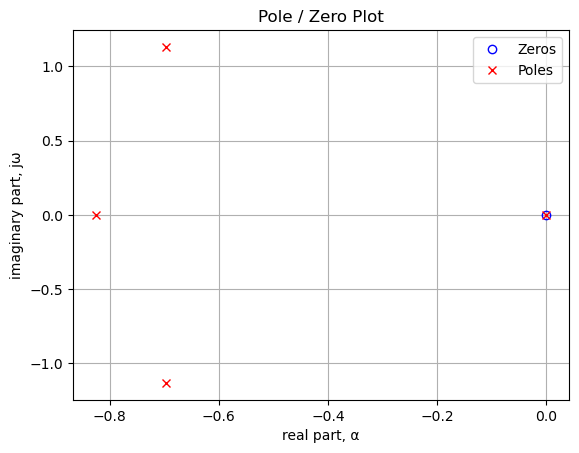

In [64]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=1)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [65]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 1
0.00 Hz


In [66]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 4
-0.11+0.18j Hz
-0.11-0.18j Hz
-0.13+0.00j Hz
-0.00+0.00j Hz


### Bode plot
Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. In electrical engineering, a [Bode plot](https://en.wikipedia.org/wiki/Bode_plot) is a graph of the frequency response of a system. It is usually a combination of the magnitude (usually in decibels) of the frequency response and the phase shift. As originally conceived by Hendrik Wade Bode in the 1930s, the plot is an asymptotic approximation of the frequency response, using straight line segments. Bode plots are used to assess the stability of systems by finding the gain and phase margins.

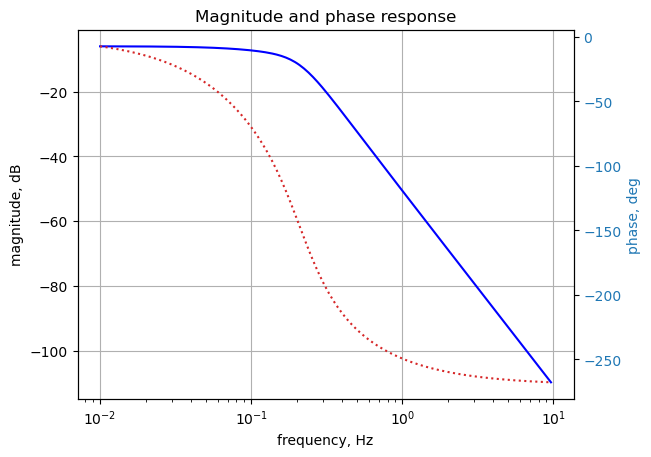

In [67]:
x = np.logspace(-2, 1, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

### Filter impulse and step response
Use the SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

The [impulse](https://en.wikipedia.org/wiki/Impulse_response) and [step response](https://en.wikipedia.org/wiki/Step_response) of the filter are plotted below. Any linear, time-invariant is completely characterized by its impulse response. The transfer function is the Laplace transform of the impulse response. The impulse response defines the response of a linear time-invariant system for all frequencies.

In electronic engineering and control theory, step response is the time behavior of the outputs of a general system when its inputs change from zero to one in a very short time.

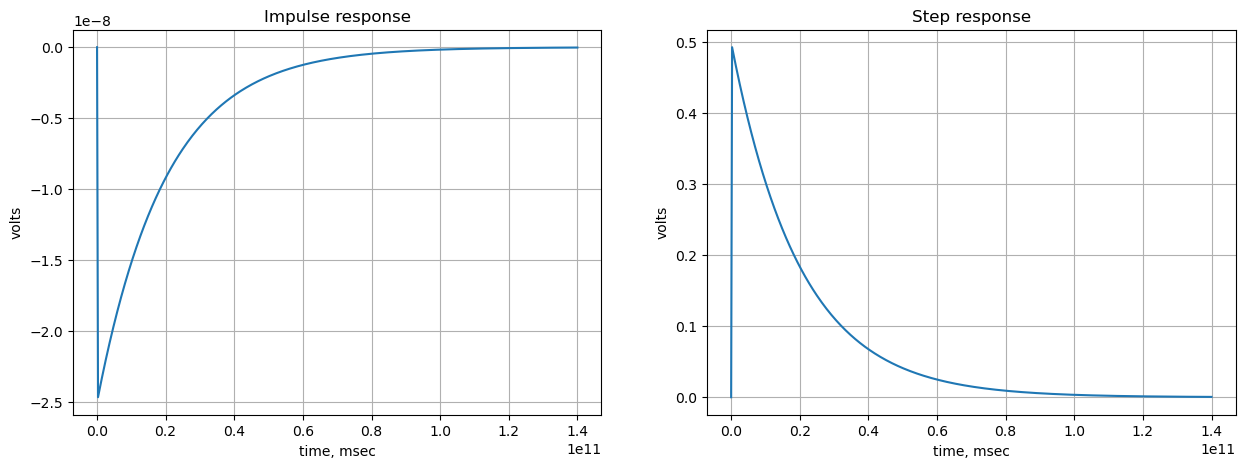

In [68]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# show plot
plt.show()

### Low pass filter group delay
The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

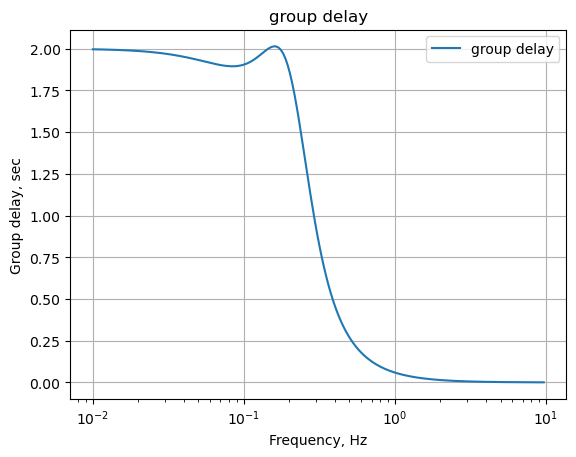

In [69]:
#w_preamp, mag_preamp, phase_preamp = bp_sys.bode(w=x_axis_range)

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w),'-',label='group delay')

plt.ylabel('Group delay, sec')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.grid()
plt.show()

## 2nd filter

In [102]:
net_list = '''
V1 1 0 1
C1 1 3 0.01e-6
C2 4 5 0.01e-6
C3 6 7 0.01e-6
C4 2 0 0.01e-6
R1 3 4 22.1e3
R2 4 2 97.6e3
R3 5 6 40.2e3
R4 7 8 41.2e3
R5 8 0 40.2e3
O1 4 6 7 
O2 8 6 5
R9 2 0 10e6
'''

Generate the network equations.

In [103]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [104]:
print(report)

Net list report
number of lines in netlist: 13
number of branches: 11
number of nodes: 8
number of unknown currents: 3
number of RLC (passive components): 10
number of inductors: 0
number of independent voltage sources: 1
number of independent current sources: 0
number of op amps: 2
number of E - VCVS: 0
number of G - VCCS: 0
number of F - CCCS: 0
number of H - CCVS: 0
number of K - Coupled inductors: 0



In [105]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$C_{1} s v_{1} - C_{1} s v_{3} + I_{V1} = 0$<br>$v_{2} \left(C_{4} s + \frac{1}{R_{9}} + \frac{1}{R_{2}}\right) - \frac{v_{4}}{R_{2}} = 0$<br>$- C_{1} s v_{1} + v_{3} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{1}} = 0$<br>$- C_{2} s v_{5} + v_{4} \left(C_{2} s + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{R_{2}} - \frac{v_{3}}{R_{1}} = 0$<br>$- C_{2} s v_{4} + I_{O2} + v_{5} \left(C_{2} s + \frac{1}{R_{3}}\right) - \frac{v_{6}}{R_{3}} = 0$<br>$- C_{3} s v_{7} + v_{6} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{5}}{R_{3}} = 0$<br>$- C_{3} s v_{6} + I_{O1} + v_{7} \left(C_{3} s + \frac{1}{R_{4}}\right) - \frac{v_{8}}{R_{4}} = 0$<br>$v_{8} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{4}}\right) - \frac{v_{7}}{R_{4}} = 0$<br>$v_{1} = V_{1}$<br>$v_{4} - v_{6} = 0$<br>$- v_{6} + v_{8} = 0$<br>

As shown above MNA generated many equations and these would be difficult to solve by hand and a symbolic soultion would take a lot of computing time. The equations are displace in matrix notation.

In [106]:
NE_sym

⎡        C₁⋅s⋅v₁ - C₁⋅s⋅v₃ + I_V1        ⎤       
⎢                                        ⎥       
⎢           ⎛       1    1 ⎞   v₄        ⎥       
⎢        v₂⋅⎜C₄⋅s + ── + ──⎟ - ──        ⎥       
⎢           ⎝       R₉   R₂⎠   R₂        ⎥       
⎢                                        ⎥       
⎢                   ⎛       1 ⎞   v₄     ⎥       
⎢     -C₁⋅s⋅v₁ + v₃⋅⎜C₁⋅s + ──⎟ - ──     ⎥   ⎡0 ⎤
⎢                   ⎝       R₁⎠   R₁     ⎥   ⎢  ⎥
⎢                                        ⎥   ⎢0 ⎥
⎢              ⎛       1    1 ⎞   v₂   v₃⎥   ⎢  ⎥
⎢-C₂⋅s⋅v₅ + v₄⋅⎜C₂⋅s + ── + ──⎟ - ── - ──⎥   ⎢0 ⎥
⎢              ⎝       R₂   R₁⎠   R₂   R₁⎥   ⎢  ⎥
⎢                                        ⎥   ⎢0 ⎥
⎢                      ⎛       1 ⎞   v₆  ⎥   ⎢  ⎥
⎢ -C₂⋅s⋅v₄ + I_O2 + v₅⋅⎜C₂⋅s + ──⎟ - ──  ⎥   ⎢0 ⎥
⎢                      ⎝       R₃⎠   R₃  ⎥   ⎢  ⎥
⎢                                        ⎥ = ⎢0 ⎥
⎢                   ⎛       1 ⎞   v₅     ⎥   ⎢  ⎥
⎢     -C₃⋅s⋅v₇ + v₆⋅⎜C₃⋅s + ──⎟ - ──     ⎥   ⎢0 ⎥


The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [107]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

In [108]:
element_values = SymMNA.get_part_values(network_df)
element_values

{C₁: 1e-08, C₂: 1e-08, C₃: 1e-08, C₄: 1e-08, O₁: nan, O₂: nan, R₁: 22100.0, R₂
: 97600.0, R₃: 40200.0, R₄: 41200.0, R₅: 40200.0, R₉: 10000000.0, V₁: 1.0}

### Transfer function
Solving for the transfer function at node 2. Transfer functions are normally presented in the frequency domain and are steady state responses.

In [109]:
U_sym = solve(NE_sym,X)

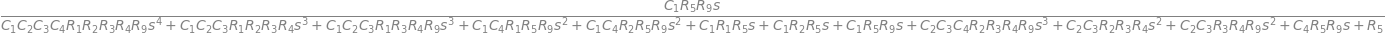

In [111]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym

### Numerical solution

In [112]:
NE = NE_sym.subs(element_values)
NE

⎡                                  I_V1 + 1.0e-8⋅s⋅v₁ - 1.0e-8⋅s⋅v₃           
⎢                                                                             
⎢                    v₂⋅(1.0e-8⋅s + 1.03459016393443e-5) - 1.02459016393443e-5
⎢                                                                             
⎢            -1.0e-8⋅s⋅v₁ + v₃⋅(1.0e-8⋅s + 4.52488687782805e-5) - 4.5248868778
⎢                                                                             
⎢-1.0e-8⋅s⋅v₅ - 1.02459016393443e-5⋅v₂ - 4.52488687782805e-5⋅v₃ + v₄⋅(1.0e-8⋅s
⎢                                                                             
⎢         I_O2 - 1.0e-8⋅s⋅v₄ + v₅⋅(1.0e-8⋅s + 2.48756218905473e-5) - 2.4875621
⎢                                                                             
⎢            -1.0e-8⋅s⋅v₇ - 2.48756218905473e-5⋅v₅ + v₆⋅(1.0e-8⋅s + 2.48756218
⎢                                                                             
⎢         I_O1 - 1.0e-8⋅s⋅v₆ + v₇⋅(1.0e-8⋅s + 2.4271

In [113]:
U = solve(NE,X)

In [114]:
temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{2.79920457659434 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.38295448800061 \cdot 10^{50} s^{3} + 4.51517610124731 \cdot 10^{53} s^{2} + 5.63191563197051 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{57}}$<br>$v_{3} = \frac{2.48756218905472 \cdot 10^{46} s^{4} + 2.57360737297121 \cdot 10^{49} s^{3} + 3.35064787818341 \cdot 10^{53} s^{2} + 2.83271105537617 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.38295448800061 \cdot 10^{50} s^{3} + 4.51517610124731 \cdot 10^{53} s^{2} + 5.63191563197051 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{57}}$<br>$v_{4} = \frac{2.73202366675606 \cdot 10^{53} s^{2} + 2.8265248132619 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.38295448800061 \cdot 10^{50} s^{3} + 4.51517610124731 \cdot 10^{53} s^{2} + 5.63191563197051 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{57}}$<br>$v_{5} = \frac{- 1.12559375070349 \cdot 10^{50} s^{3} + 1.56749544369217 \cdot 10^{53} s^{2} + 2.8265248132619 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.38295448800061 \cdot 10^{50} s^{3} + 4.51517610124731 \cdot 10^{53} s^{2} + 5.63191563197051 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{57}}$<br>$v_{6} = \frac{2.73202366675606 \cdot 10^{53} s^{2} + 2.8265248132619 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.38295448800061 \cdot 10^{50} s^{3} + 4.51517610124731 \cdot 10^{53} s^{2} + 5.63191563197051 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{57}}$<br>$v_{7} = \frac{5.53200812124237 \cdot 10^{53} s^{2} + 5.72336118904274 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.38295448800061 \cdot 10^{50} s^{3} + 4.51517610124731 \cdot 10^{53} s^{2} + 5.63191563197051 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{57}}$<br>$v_{8} = \frac{2.73202366675606 \cdot 10^{53} s^{2} + 2.8265248132619 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.38295448800061 \cdot 10^{50} s^{3} + 4.51517610124731 \cdot 10^{53} s^{2} + 5.63191563197051 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{57}}$<br>$I_{V1} = \frac{- 1.12559375070349 \cdot 10^{50} s^{4} - 1.1645282230639 \cdot 10^{53} s^{3} - 2.79920457659434 \cdot 10^{56} s^{2} - 2.79920457659434 \cdot 10^{57} s}{2.48756218905472 \cdot 10^{54} s^{4} + 1.38295448800061 \cdot 10^{58} s^{3} + 4.51517610124731 \cdot 10^{61} s^{2} + 5.63191563197051 \cdot 10^{64} s + 2.79920457659434 \cdot 10^{65}}$<br>$I_{O1} = \frac{- 2.18748785506742 \cdot 10^{62} s^{3} - 7.57258996000457 \cdot 10^{65} s^{2} - 5.49309082179316 \cdot 10^{68} s}{1.943407960199 \cdot 10^{63} s^{4} + 1.08043319375048 \cdot 10^{67} s^{3} + 3.52748132909946 \cdot 10^{70} s^{2} + 4.39993408747696 \cdot 10^{73} s + 2.18687857546433 \cdot 10^{74}}$<br>$I_{O2} = \frac{1.75874023547421 \cdot 10^{48} s^{4} + 6.19455105867219 \cdot 10^{51} s^{3} + 4.52630683715756 \cdot 10^{54} s^{2}}{3.886815920398 \cdot 10^{52} s^{4} + 2.16086638750096 \cdot 10^{56} s^{3} + 7.05496265819892 \cdot 10^{59} s^{2} + 8.79986817495392 \cdot 10^{62} s + 4.37375715092865 \cdot 10^{63}}$<br>

In [116]:
H = (U[v2]/U[v1]).nsimplify().simplify().expand().together()
H

#### Convert transfer function to SciPy system
In this section we convert the SymPy equations into Numpy format.  

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [117]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [118]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

### Poles and zeros of the low pass transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [119]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

#### Low pass filter pole zero plot
The poles and zeros of the preamp transfer function are plotted.

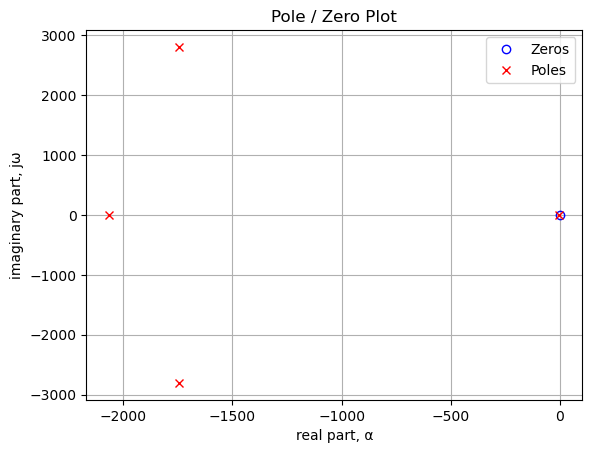

In [120]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=1)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [121]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 1
0.00 Hz


In [122]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 4
-277.63+446.59j Hz
-277.63-446.59j Hz
-328.76+0.00j Hz
-0.79+0.00j Hz


### Bode plot
Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. In electrical engineering, a [Bode plot](https://en.wikipedia.org/wiki/Bode_plot) is a graph of the frequency response of a system. It is usually a combination of the magnitude (usually in decibels) of the frequency response and the phase shift. As originally conceived by Hendrik Wade Bode in the 1930s, the plot is an asymptotic approximation of the frequency response, using straight line segments. Bode plots are used to assess the stability of systems by finding the gain and phase margins.

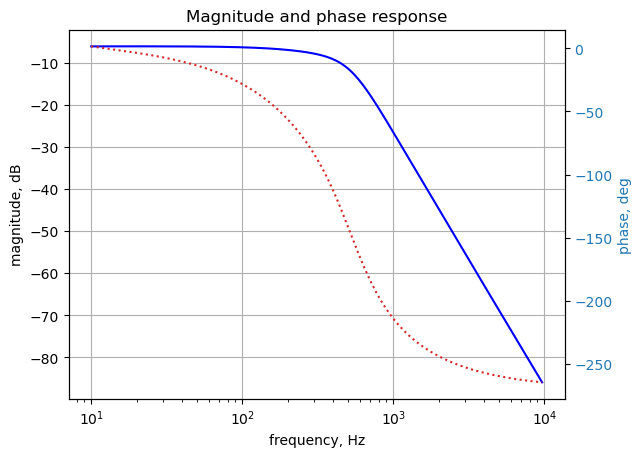

In [123]:
x = np.logspace(1, 4, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

### Filter impulse and step response
Use the SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

The [impulse](https://en.wikipedia.org/wiki/Impulse_response) and [step response](https://en.wikipedia.org/wiki/Step_response) of the filter are plotted below. Any linear, time-invariant is completely characterized by its impulse response. The transfer function is the Laplace transform of the impulse response. The impulse response defines the response of a linear time-invariant system for all frequencies.

In electronic engineering and control theory, step response is the time behavior of the outputs of a general system when its inputs change from zero to one in a very short time.

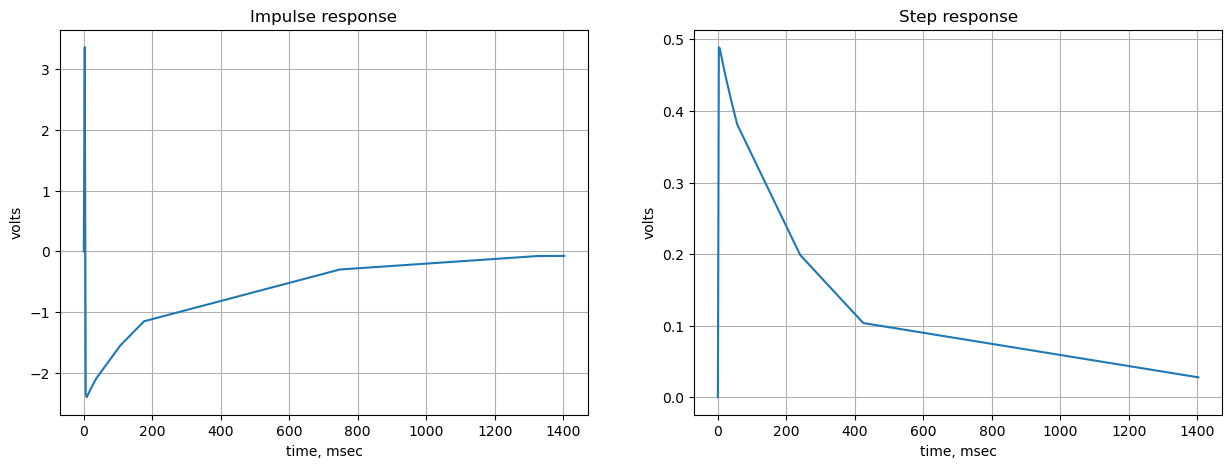

In [124]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# show plot
plt.show()

### Low pass filter group delay
The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

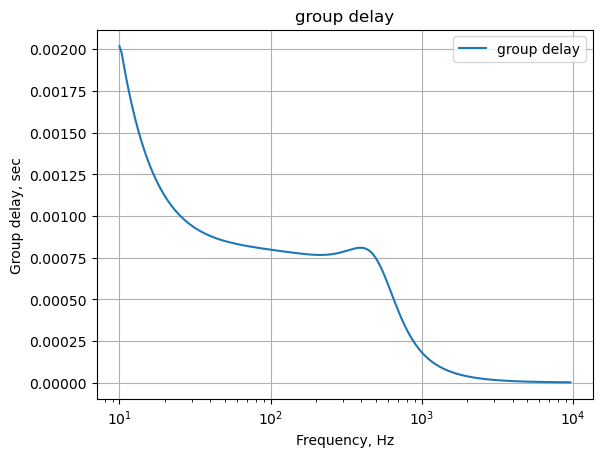

In [125]:
#w_preamp, mag_preamp, phase_preamp = bp_sys.bode(w=x_axis_range)

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w),'-',label='group delay')

plt.ylabel('Group delay, sec')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.grid()
plt.show()

## 3rd filter

In [70]:
net_list = '''
O1 4 0 5 
R1 3 1 0.3375
R2 4 3 0.225
R3 5 3 0.675
C1 5 4 1
C2 3 0 3.27
O2 2 7 2 
R4 6 5 1
R5 7 6 1
C3 2 6 1.012
C4 7 0 0.39
V1 1 0 1
'''

Generate the network equations.

In [71]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [72]:
print(report)

Net list report
number of lines in netlist: 12
number of branches: 10
number of nodes: 7
number of unknown currents: 3
number of RLC (passive components): 9
number of inductors: 0
number of independent voltage sources: 1
number of independent current sources: 0
number of op amps: 2
number of E - VCVS: 0
number of G - VCCS: 0
number of F - CCCS: 0
number of H - CCVS: 0
number of K - Coupled inductors: 0



In [73]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{3}}{R_{1}} = 0$<br>$C_{3} s v_{2} - C_{3} s v_{6} + I_{O2} = 0$<br>$v_{3} \left(C_{2} s + \frac{1}{R_{3}} + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{5}}{R_{3}} - \frac{v_{4}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$<br>$- C_{1} s v_{5} + v_{4} \left(C_{1} s + \frac{1}{R_{2}}\right) - \frac{v_{3}}{R_{2}} = 0$<br>$- C_{1} s v_{4} + I_{O1} + v_{5} \left(C_{1} s + \frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{6}}{R_{4}} - \frac{v_{3}}{R_{3}} = 0$<br>$- C_{3} s v_{2} + v_{6} \left(C_{3} s + \frac{1}{R_{5}} + \frac{1}{R_{4}}\right) - \frac{v_{7}}{R_{5}} - \frac{v_{5}}{R_{4}} = 0$<br>$v_{7} \left(C_{4} s + \frac{1}{R_{5}}\right) - \frac{v_{6}}{R_{5}} = 0$<br>$v_{1} = V_{1}$<br>$v_{4} = 0$<br>$v_{2} - v_{7} = 0$<br>

As shown above MNA generated many equations and these would be difficult to solve by hand and a symbolic soultion would take a lot of computing time. The equations are displace in matrix notation.

In [74]:
NE_sym

⎡                       v₁   v₃                 ⎤       
⎢                I_V1 + ── - ──                 ⎥       
⎢                       R₁   R₁                 ⎥       
⎢                                               ⎥       
⎢           C₃⋅s⋅v₂ - C₃⋅s⋅v₆ + I_O2            ⎥       
⎢                                               ⎥       
⎢       ⎛       1    1    1 ⎞   v₅   v₄   v₁    ⎥   ⎡0 ⎤
⎢    v₃⋅⎜C₂⋅s + ── + ── + ──⎟ - ── - ── - ──    ⎥   ⎢  ⎥
⎢       ⎝       R₃   R₂   R₁⎠   R₃   R₂   R₁    ⎥   ⎢0 ⎥
⎢                                               ⎥   ⎢  ⎥
⎢                      ⎛       1 ⎞   v₃         ⎥   ⎢0 ⎥
⎢        -C₁⋅s⋅v₅ + v₄⋅⎜C₁⋅s + ──⎟ - ──         ⎥   ⎢  ⎥
⎢                      ⎝       R₂⎠   R₂         ⎥   ⎢0 ⎥
⎢                                               ⎥   ⎢  ⎥
⎢                     ⎛       1    1 ⎞   v₆   v₃⎥   ⎢0 ⎥
⎢-C₁⋅s⋅v₄ + I_O1 + v₅⋅⎜C₁⋅s + ── + ──⎟ - ── - ──⎥ = ⎢  ⎥
⎢                     ⎝       R₄   R₃⎠   R₄   R₃⎥   ⎢0 ⎥
⎢                              

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [75]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

In [76]:
element_values = SymMNA.get_part_values(network_df)
element_values

{C₁: 1.0, C₂: 3.27, C₃: 1.012, C₄: 0.39, O₁: nan, O₂: nan, R₁: 0.3375, R₂: 0.2
25, R₃: 0.675, R₄: 1.0, R₅: 1.0, V₁: 1.0}

### Transfer function
Solving for the transfer function at node 2. Transfer functions are normally presented in the frequency domain and are steady state responses.

In [77]:
U_sym = solve(NE_sym,X)

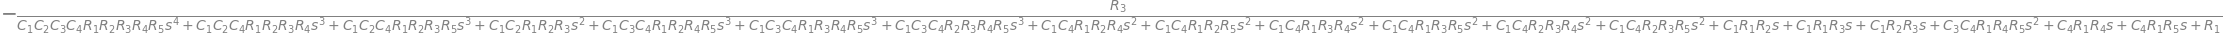

In [79]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym

### Numerical solution

In [80]:
NE = NE_sym.subs(element_values)
NE

⎡                        I_V1 + 2.96296296296296⋅v₁ - 2.96296296296296⋅v₃     
⎢                                                                             
⎢                                 I_O2 + 1.012⋅s⋅v₂ - 1.012⋅s⋅v₆              
⎢                                                                             
⎢-2.96296296296296⋅v₁ + v₃⋅(3.27⋅s + 8.88888888888889) - 4.44444444444444⋅v₄ -
⎢                                                                             
⎢                   -s⋅v₅ - 4.44444444444444⋅v₃ + v₄⋅(1.0⋅s + 4.44444444444444
⎢                                                                             
⎢             I_O1 - s⋅v₄ - 1.48148148148148⋅v₃ + v₅⋅(1.0⋅s + 2.48148148148148
⎢                                                                             
⎢                           -1.012⋅s⋅v₂ - v₅ + v₆⋅(1.012⋅s + 2.0) - v₇        
⎢                                                                             
⎢                                     -v₆ + v₇⋅(0.39

In [81]:
U = solve(NE,X)

In [82]:
temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = - \frac{8000000000.0}{784041687.0 s^{4} + 3680761500.0 s^{3} + 7777245000.0 s^{2} + 8520000000.0 s + 4000000000.0}$<br>$v_{3} = \frac{72000.0 s}{79461.0 s^{2} + 216000.0 s + 160000.0}$<br>$v_{4} = 0.0$<br>$v_{5} = - \frac{320000.0}{79461.0 s^{2} + 216000.0 s + 160000.0}$<br>$v_{6} = \frac{- 3120000000.0 s - 8000000000.0}{784041687.0 s^{4} + 3680761500.0 s^{3} + 7777245000.0 s^{2} + 8520000000.0 s + 4000000000.0}$<br>$v_{7} = - \frac{8000000000.0}{784041687.0 s^{4} + 3680761500.0 s^{3} + 7777245000.0 s^{2} + 8520000000.0 s + 4000000000.0}$<br>$I_{V1} = \frac{- 6356880.0 s^{2} - 11520000.0 s - 12800000.0}{2145447.0 s^{2} + 5832000.0 s + 4320000.0}$<br>$I_{O1} = \frac{113667840000.0 s^{3} + 436188480000.0 s^{2} + 621840000000.0 s + 320000000000.0}{21169125549.0 s^{4} + 99380560500.0 s^{3} + 209985615000.0 s^{2} + 230040000000.0 s + 108000000000.0}$<br>$I_{O2} = - \frac{3157440000.0 s^{2}}{784041687.0 s^{4} + 3680761500.0 s^{3} + 7777245000.0 s^{2} + 8520000000.0 s + 4000000000.0}$<br>

In [84]:
H = (U[v2]/U[v1]).nsimplify().simplify().expand().together()
H

#### Convert transfer function to SciPy system
In this section we convert the SymPy equations into Numpy format.  

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [85]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [86]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

### Poles and zeros of the low pass transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [87]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

#### Low pass filter pole zero plot
The poles and zeros of the preamp transfer function are plotted.

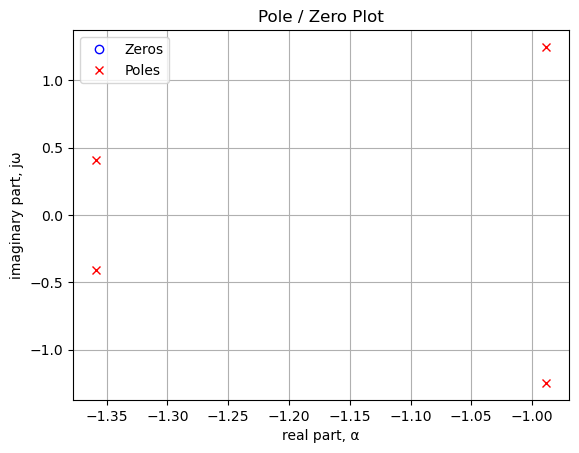

In [89]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [90]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 0


In [91]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 4
-0.16+0.20j Hz
-0.16-0.20j Hz
-0.22+0.06j Hz
-0.22-0.06j Hz


### Bode plot
Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. In electrical engineering, a [Bode plot](https://en.wikipedia.org/wiki/Bode_plot) is a graph of the frequency response of a system. It is usually a combination of the magnitude (usually in decibels) of the frequency response and the phase shift. As originally conceived by Hendrik Wade Bode in the 1930s, the plot is an asymptotic approximation of the frequency response, using straight line segments. Bode plots are used to assess the stability of systems by finding the gain and phase margins.

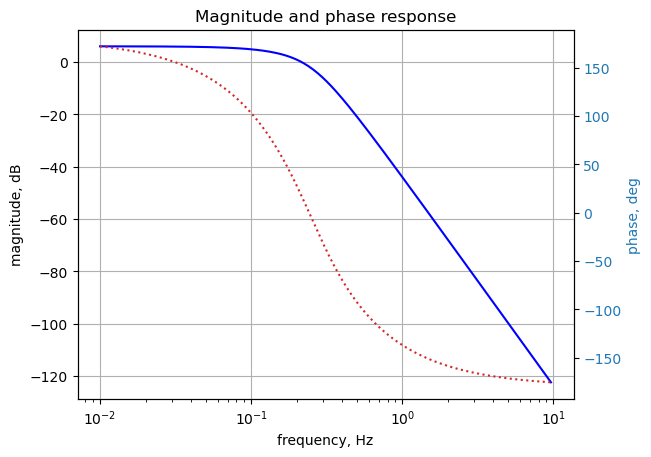

In [93]:
x = np.logspace(-2, 1, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

### Filter impulse and step response
Use the SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

The [impulse](https://en.wikipedia.org/wiki/Impulse_response) and [step response](https://en.wikipedia.org/wiki/Step_response) of the filter are plotted below. Any linear, time-invariant is completely characterized by its impulse response. The transfer function is the Laplace transform of the impulse response. The impulse response defines the response of a linear time-invariant system for all frequencies.

In electronic engineering and control theory, step response is the time behavior of the outputs of a general system when its inputs change from zero to one in a very short time.

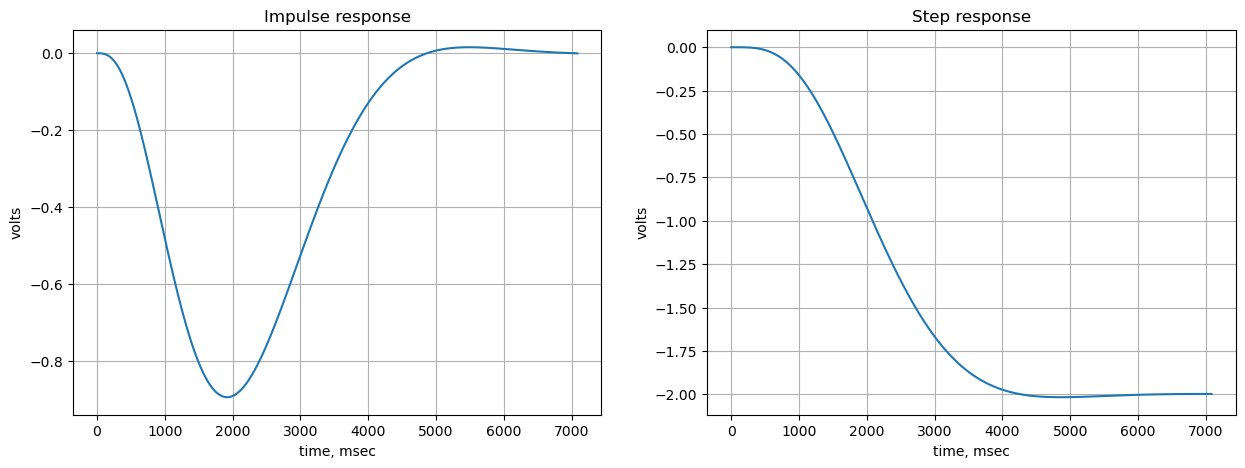

In [94]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# show plot
plt.show()

### Low pass filter group delay
The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

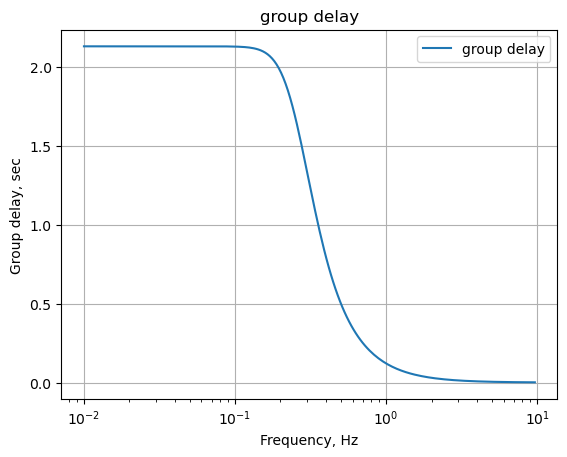

In [95]:
#w_preamp, mag_preamp, phase_preamp = bp_sys.bode(w=x_axis_range)

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w),'-',label='group delay')

plt.ylabel('Group delay, sec')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.grid()
plt.show()

## DABP filter

In [235]:
net_list = '''
O1 5 4 2
O2 5 6 3
R1 4 1 0.75
R2 4 3 1
R3 5 2 1
R5 6 2 1
R4 6 0 1
C2 5 3 1
C1 0 4 1
V1 1 0 1
'''

Generate the network equations.

In [236]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [237]:
print(report)

Net list report
number of lines in netlist: 10
number of branches: 8
number of nodes: 6
number of unknown currents: 3
number of RLC (passive components): 7
number of inductors: 0
number of independent voltage sources: 1
number of independent current sources: 0
number of op amps: 2
number of E - VCVS: 0
number of G - VCCS: 0
number of F - CCCS: 0
number of H - CCVS: 0
number of K - Coupled inductors: 0



In [238]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{4}}{R_{1}} = 0$<br>$I_{O1} + v_{2} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{3}}\right) - \frac{v_{6}}{R_{5}} - \frac{v_{5}}{R_{3}} = 0$<br>$- C_{2} s v_{5} + I_{O2} + v_{3} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{4}}{R_{2}} = 0$<br>$v_{4} \left(C_{1} s + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$<br>$- C_{2} s v_{3} + v_{5} \left(C_{2} s + \frac{1}{R_{3}}\right) - \frac{v_{2}}{R_{3}} = 0$<br>$v_{6} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{4}}\right) - \frac{v_{2}}{R_{5}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{4} + v_{5} = 0$<br>$v_{5} - v_{6} = 0$<br>

As shown above MNA generated many equations and these would be difficult to solve by hand and a symbolic soultion would take a lot of computing time. The equations are displace in matrix notation.

In [239]:
NE_sym

⎡                  v₁   v₄            ⎤       
⎢           I_V1 + ── - ──            ⎥       
⎢                  R₁   R₁            ⎥       
⎢                                     ⎥       
⎢              ⎛1    1 ⎞   v₆   v₅    ⎥       
⎢    I_O1 + v₂⋅⎜── + ──⎟ - ── - ──    ⎥       
⎢              ⎝R₅   R₃⎠   R₅   R₃    ⎥   ⎡0 ⎤
⎢                                     ⎥   ⎢  ⎥
⎢                     ⎛       1 ⎞   v₄⎥   ⎢0 ⎥
⎢-C₂⋅s⋅v₅ + I_O2 + v₃⋅⎜C₂⋅s + ──⎟ - ──⎥   ⎢  ⎥
⎢                     ⎝       R₂⎠   R₂⎥   ⎢0 ⎥
⎢                                     ⎥   ⎢  ⎥
⎢       ⎛       1    1 ⎞   v₃   v₁    ⎥   ⎢0 ⎥
⎢    v₄⋅⎜C₁⋅s + ── + ──⎟ - ── - ──    ⎥   ⎢  ⎥
⎢       ⎝       R₂   R₁⎠   R₂   R₁    ⎥ = ⎢0 ⎥
⎢                                     ⎥   ⎢  ⎥
⎢                 ⎛       1 ⎞   v₂    ⎥   ⎢0 ⎥
⎢   -C₂⋅s⋅v₃ + v₅⋅⎜C₂⋅s + ──⎟ - ──    ⎥   ⎢  ⎥
⎢                 ⎝       R₃⎠   R₃    ⎥   ⎢V₁⎥
⎢                                     ⎥   ⎢  ⎥
⎢             ⎛1    1 ⎞   v₂          ⎥   ⎢0 ⎥
⎢          v₆

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [240]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

In [241]:
element_values = SymMNA.get_part_values(network_df)
element_values

{C₁: 1.0, C₂: 1.0, O₁: nan, O₂: nan, R₁: 0.75, R₂: 1.0, R₃: 1.0, R₄: 1.0, R₅: 
1.0, V₁: 1.0}

### Transfer function
Solving for the transfer function at node 2. Transfer functions are normally presented in the frequency domain and are steady state responses.

In [242]:
U_sym = solve(NE_sym,X)

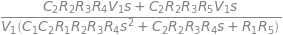

In [243]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym

### Numerical solution

In [244]:
NE = NE_sym.subs(element_values)
NE

⎡    I_V1 + 1.33333333333333⋅v₁ - 1.33333333333333⋅v₄     ⎤   ⎡ 0 ⎤
⎢                                                         ⎥   ⎢   ⎥
⎢                 I_O1 + 2.0⋅v₂ - v₅ - v₆                 ⎥   ⎢ 0 ⎥
⎢                                                         ⎥   ⎢   ⎥
⎢           I_O2 - s⋅v₅ + v₃⋅(1.0⋅s + 1.0) - v₄           ⎥   ⎢ 0 ⎥
⎢                                                         ⎥   ⎢   ⎥
⎢-1.33333333333333⋅v₁ - v₃ + v₄⋅(1.0⋅s + 2.33333333333333)⎥   ⎢ 0 ⎥
⎢                                                         ⎥   ⎢   ⎥
⎢              -s⋅v₃ - v₂ + v₅⋅(1.0⋅s + 1.0)              ⎥ = ⎢ 0 ⎥
⎢                                                         ⎥   ⎢   ⎥
⎢                      -v₂ + 2.0⋅v₆                       ⎥   ⎢ 0 ⎥
⎢                                                         ⎥   ⎢   ⎥
⎢                           v₁                            ⎥   ⎢1.0⎥
⎢                                                         ⎥   ⎢   ⎥
⎢                        -v₄ + v₅               

In [245]:
U = solve(NE,X)

In [246]:
temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{8.0 s}{3.0 s^{2} + 4.0 s + 3.0}$<br>$v_{3} = \frac{4.0 s - 4.0}{3.0 s^{2} + 4.0 s + 3.0}$<br>$v_{4} = \frac{4.0 s}{3.0 s^{2} + 4.0 s + 3.0}$<br>$v_{5} = \frac{4.0 s}{3.0 s^{2} + 4.0 s + 3.0}$<br>$v_{6} = \frac{4.0 s}{3.0 s^{2} + 4.0 s + 3.0}$<br>$I_{V1} = \frac{- 4.0 s^{2} - 4.0}{3.0 s^{2} + 4.0 s + 3.0}$<br>$I_{O1} = - \frac{8.0 s}{3.0 s^{2} + 4.0 s + 3.0}$<br>$I_{O2} = \frac{4.0 s + 4.0}{3.0 s^{2} + 4.0 s + 3.0}$<br>

In [247]:
H = (U[v2]/U[v1]).nsimplify().simplify().expand().together()
H

#### Convert transfer function to SciPy system
In this section we convert the SymPy equations into Numpy format.  

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [248]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [249]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

### Poles and zeros of the low pass transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [250]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

#### Low pass filter pole zero plot
The poles and zeros of the preamp transfer function are plotted.

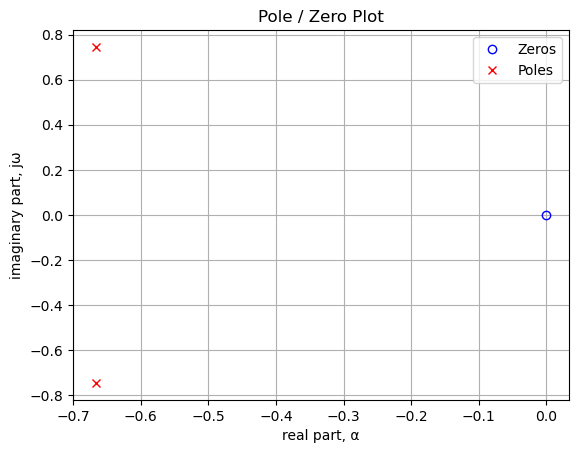

In [251]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [252]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 1
0.00 Hz


In [253]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 2
-0.11+0.12j Hz
-0.11-0.12j Hz


### Bode plot
Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. In electrical engineering, a [Bode plot](https://en.wikipedia.org/wiki/Bode_plot) is a graph of the frequency response of a system. It is usually a combination of the magnitude (usually in decibels) of the frequency response and the phase shift. As originally conceived by Hendrik Wade Bode in the 1930s, the plot is an asymptotic approximation of the frequency response, using straight line segments. Bode plots are used to assess the stability of systems by finding the gain and phase margins.

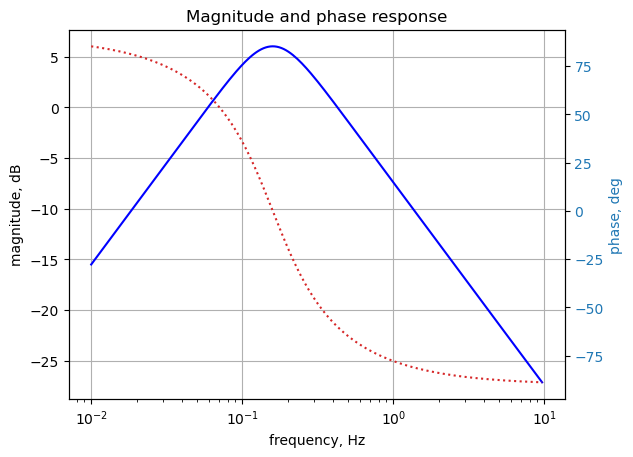

In [254]:
x = np.logspace(-2, 1, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

### Filter impulse and step response
Use the SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

The [impulse](https://en.wikipedia.org/wiki/Impulse_response) and [step response](https://en.wikipedia.org/wiki/Step_response) of the filter are plotted below. Any linear, time-invariant is completely characterized by its impulse response. The transfer function is the Laplace transform of the impulse response. The impulse response defines the response of a linear time-invariant system for all frequencies.

In electronic engineering and control theory, step response is the time behavior of the outputs of a general system when its inputs change from zero to one in a very short time.

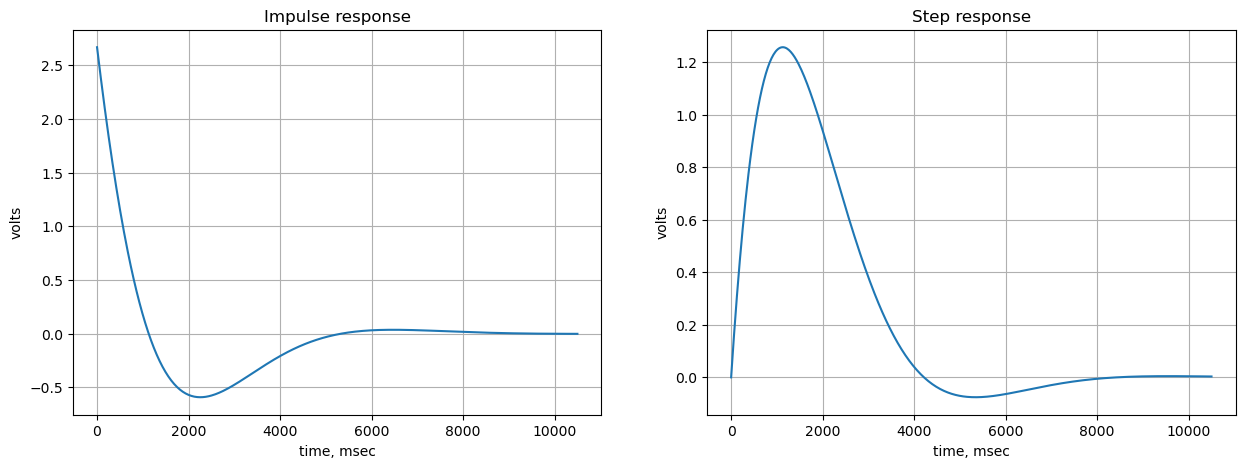

In [255]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# show plot
plt.show()

### Low pass filter group delay
The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

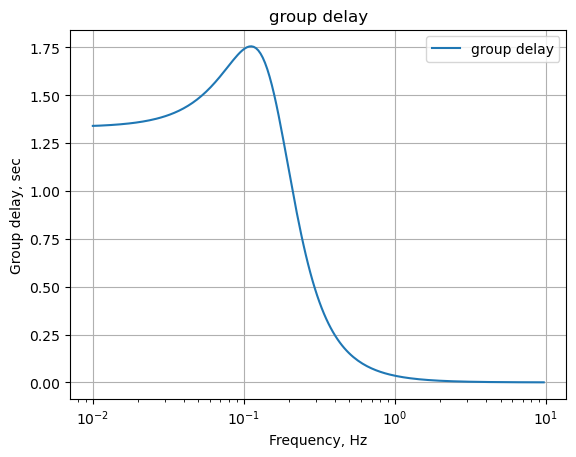

In [256]:
#w_preamp, mag_preamp, phase_preamp = bp_sys.bode(w=x_axis_range)

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w),'-',label='group delay')

plt.ylabel('Group delay, sec')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.grid()
plt.show()

## LTSpice Solution
To chech the Python results the circuit was simulated in LTSpice. The following schematice was used and the LTSpice results are also shown below.

![Circuit used for LTSpice analysis](Bridge-T-LTSpice.png){#fig-bridge-LTPpice} 

![Plot from LTSpice of node voltages](Bridge-T-LTSpice-plot.png){#fig-bridge-LTSpice-plot} 

Load the csv file LTSpice results and plot along with the results obtained from Python.

In [95]:
fn = 'Bridge-T-LTSpice.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',',skip_header=1)

Copy the data from the csv file into NumPy arrays.

In [96]:
# initaliase some empty arrays
time = np.zeros(len(LTSpice_data))
voltage1 = np.zeros(len(LTSpice_data))
voltage2 = np.zeros(len(LTSpice_data))
voltage3 = np.zeros(len(LTSpice_data))

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    time[i] = LTSpice_data[i][0]
    voltage1[i] = LTSpice_data[i][1]
    voltage2[i] = LTSpice_data[i][2]
    voltage3[i] = LTSpice_data[i][3]

Plot the LTSpice data and the Python data to see if they agree.

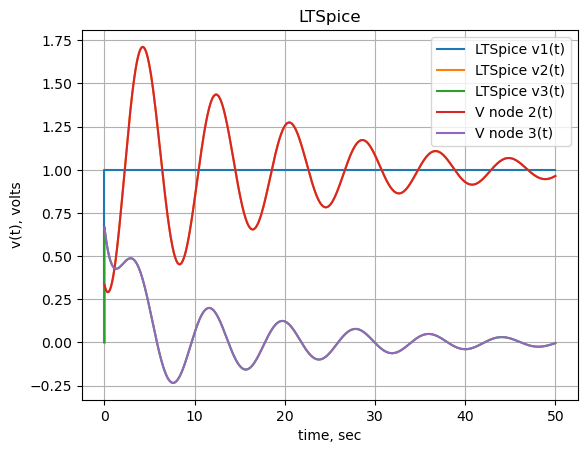

In [97]:
plt.title('LTSpice')

plt.plot(time, voltage1,label='LTSpice v1(t)')
plt.plot(time, voltage2,label='LTSpice v2(t)')
plt.plot(time, voltage3,label='LTSpice v3(t)')

plt.plot(x, np.real(V_node2),label='V node 2(t)')
plt.plot(x, np.real(V_node3),label='V node 3(t)')
#plt.plot(x, np.real(func_V1_t(x)),label='V1(t)')

plt.ylabel('v(t), volts')
plt.xlabel('time, sec')

plt.legend()
plt.grid()
plt.show()

As shown in the plot above, the curves superimpose.

## Summary


$\large{\color {red} {\text{Explain results when V4 is rotated}}}$  